# Libs imports and configs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

# Checking data completness

In [6]:
def check_columns():
    first_file_cols = None

    for folder in os.listdir('./data'):
        for file in os.listdir(f'./data/{folder}'):
            data = pd.read_csv(f'./data/{folder}/{file}')
            num_of_cols = data.shape[1]

            if first_file_cols is None:
                first_file_cols = num_of_cols
            elif first_file_cols != num_of_cols:
                return 'There is some mismatch somewhere in csvs'
    
    return 'Number of columns are matching'

In [7]:
check_columns()

'Number of columns are matching'

In [4]:
data = pd.DataFrame()

for folder in os.listdir('./data'):
    for file in os.listdir(f'./data/{folder}'):
        df = pd.read_csv(f'./data/{folder}/{file}')
        data = pd.concat([data, df], ignore_index=True)

# Basic data description

In [5]:
data.shape

(25945, 66)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25945 entries, 0 to 25944
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            25945 non-null  int64  
 1   date_GMT                             25945 non-null  object 
 2   status                               25945 non-null  object 
 3   attendance                           20594 non-null  float64
 4   home_team_name                       25945 non-null  object 
 5   away_team_name                       25945 non-null  object 
 6   referee                              16175 non-null  object 
 7   Game Week                            25184 non-null  float64
 8   Pre-Match PPG (Home)                 25945 non-null  float64
 9   Pre-Match PPG (Away)                 25945 non-null  float64
 10  home_ppg                             25945 non-null  float64
 11  away_ppg                    

In [14]:
data.isna().sum()

timestamp                                 0
date_GMT                                  0
status                                    0
attendance                             5351
home_team_name                            0
away_team_name                            0
referee                                9770
Game Week                               761
Pre-Match PPG (Home)                      0
Pre-Match PPG (Away)                      0
home_ppg                                  0
away_ppg                                  0
home_team_goal_count                      0
away_team_goal_count                      0
total_goal_count                          0
total_goals_at_half_time                  0
home_team_goal_count_half_time            0
away_team_goal_count_half_time            0
home_team_goal_timings                 5976
away_team_goal_timings                 8497
home_team_corner_count                    0
away_team_corner_count                    0
home_team_yellow_cards          

# Data tidying

In [18]:
data['date_GMT'] = pd.to_datetime(data['date_GMT'])

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_41328\3178323501.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date_GMT'] = pd.to_datetime(data['date_GMT'])


In [26]:
data['date'] = pd.to_datetime(data['date_GMT'].dt.date)
data['time'] = data['date_GMT'].dt.time

In [27]:
data.dtypes

timestamp                                       int64
date_GMT                               datetime64[ns]
status                                         object
attendance                                    float64
home_team_name                                 object
away_team_name                                 object
referee                                        object
Game Week                                     float64
Pre-Match PPG (Home)                          float64
Pre-Match PPG (Away)                          float64
home_ppg                                      float64
away_ppg                                      float64
home_team_goal_count                            int64
away_team_goal_count                            int64
total_goal_count                                int64
total_goals_at_half_time                        int64
home_team_goal_count_half_time                  int64
away_team_goal_count_half_time                  int64
home_team_goal_timings      

# Setting first target variable - result of the game

In [11]:
data['result'] = np.where(data['home_team_goal_count'] == data['away_team_goal_count'], 0, np.where(data['home_team_goal_count'] > data['away_team_goal_count'], 1, 2))

In [13]:
#11,705 wins by home team, 7,611 wins by away team, 6,629 draws
data['result'].value_counts()

result
1    11705
2     7611
0     6629
Name: count, dtype: int64

# Data distributions

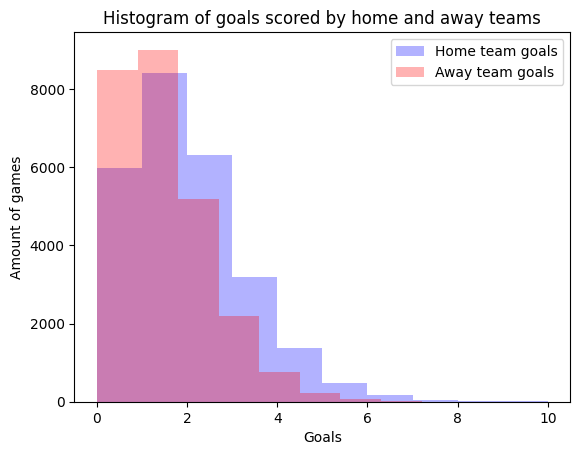

In [33]:
plt.hist(data['home_team_goal_count'], color='blue', alpha=.3)
plt.hist(data['away_team_goal_count'], color='red', alpha=.3)
plt.legend(['Home team goals', 'Away team goals'])
plt.xlabel('Goals')
plt.ylabel('Amount of games')
plt.title('Histogram of goals scored by home and away teams')
plt.show()

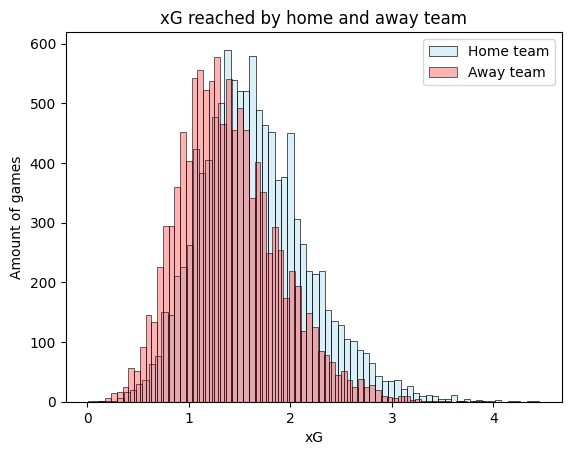

In [44]:
sns.histplot(data[data['team_a_xg'] != 0]['team_a_xg'], color='skyblue', alpha=.3)
sns.histplot(data[data['team_b_xg'] != 0]['team_b_xg'], color='red', alpha=.3)
plt.xlabel('xG')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('xG reached by home and away team')
plt.show()

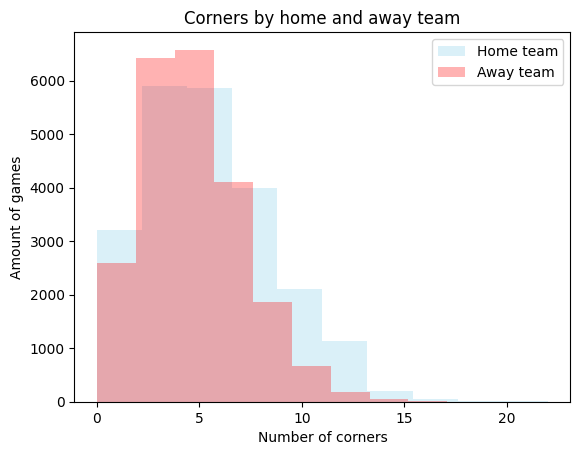

In [49]:
plt.hist(data[data['home_team_corner_count'] != -1]['home_team_corner_count'], color='skyblue', alpha=.3)
plt.hist(data[data['away_team_corner_count'] != -1]['away_team_corner_count'], color='red', alpha=.3)
plt.xlabel('Number of corners')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('Corners by home and away team')
plt.show()

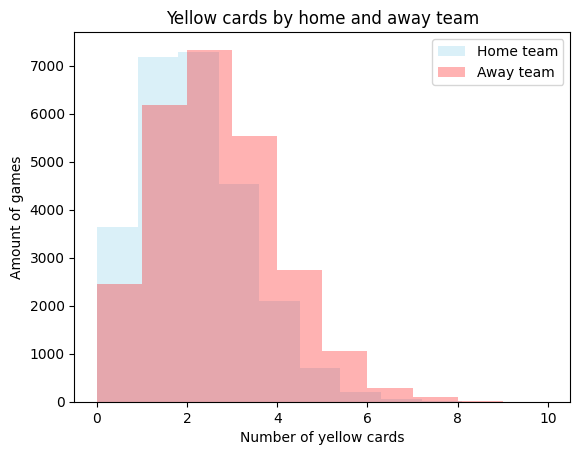

In [50]:
plt.hist(data[data['home_team_yellow_cards'] != -1]['home_team_yellow_cards'], color='skyblue', alpha=.3)
plt.hist(data[data['away_team_yellow_cards'] != -1]['away_team_yellow_cards'], color='red', alpha=.3)
plt.xlabel('Number of yellow cards')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('Yellow cards by home and away team')
plt.show()

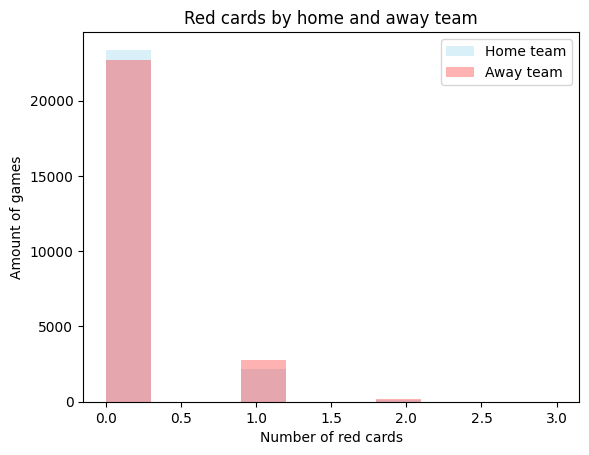

In [53]:
plt.hist(data[data['home_team_red_cards'] != -1]['home_team_red_cards'], color='skyblue', alpha=.3)
plt.hist(data[data['away_team_red_cards'] != -1]['away_team_red_cards'], color='red', alpha=.3)
plt.xlabel('Number of red cards')
plt.ylabel('Amount of games')
plt.legend(['Home team', 'Away team'])
plt.title('Red cards by home and away team')
plt.show()

In [6]:
data['odds_ft_home_team_win'].describe(percentiles=[.9, .95, .99])

count    25945.000000
mean         3.059393
std         21.294460
min          0.000000
50%          1.830000
90%          4.210000
95%          6.118000
99%          9.990000
max        501.000000
Name: odds_ft_home_team_win, dtype: float64

C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33632\2544645493.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[(data['odds_ft_home_team_win'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
C:\Users\Łukasz\AppData\Local\Temp\ipykernel_33632\2544645493.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[(data['odds_ft_away_team_win'] != 0) & (data['odds_ft_away_team_win'] <= data['odds_ft_away_team_win'].quantile(.99))] \


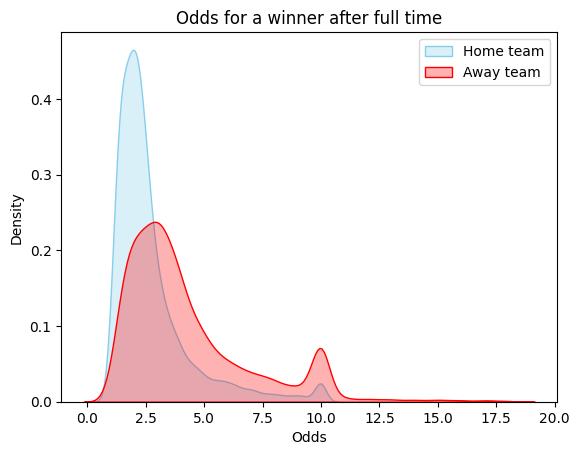

In [8]:
data['odds_ft_home_team_win'].value_counts()

sns.kdeplot(data[(data['odds_ft_home_team_win'] != 0) & (data['odds_ft_home_team_win'] <= data['odds_ft_home_team_win'].quantile(.99))] \
                            ['odds_ft_home_team_win'], color='skyblue', alpha=.3, shade=True)
sns.kdeplot(data[(data['odds_ft_away_team_win'] != 0) & (data['odds_ft_away_team_win'] <= data['odds_ft_away_team_win'].quantile(.99))] \
                            ['odds_ft_away_team_win'], color='red', alpha=.3, shade=True)
plt.xlabel('Odds')
plt.legend(['Home team', 'Away team'])
plt.title('Odds for a winner after full time')
plt.show()

# Correlations between discrete variables

In [55]:
from scipy.stats import kendalltau

In [57]:
vars = [
    'home_team_goal_count',
    'away_team_goal_count',
    'total_goal_count',
    'total_goal_count',
    'home_team_corner_count',
    'away_team_corner_count',
    'home_team_yellow_cards',
    'home_team_red_cards',
    'away_team_yellow_cards',
    'away_team_red_cards',
    'home_team_shots',
    'away_team_shots',
    'home_team_shots_on_target',
    'away_team_shots_on_target',
    'home_team_shots_off_target',
    'away_team_shots_off_target',
    'home_team_fouls',
    'away_team_fouls',
    'home_team_possession',
    'away_team_possession'
]

In [62]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [63]:
kendall_results = {}
for var in vars:
    p_val = kendalltau(data[var], data['result'])[1]
    kendall_results[f'{var} vs result'] = p_val
pd.DataFrame(kendall_results, index=['kendall_pval']).T

,kendall_pval
home_team_goal_count vs result,0.00000000
away_team_goal_count vs result,0.00000000
total_goal_count vs result,0.00000000
home_team_corner_count vs result,0.79726628
away_team_corner_count vs result,0.00000000
home_team_yellow_cards vs result,0.00000085
home_team_red_cards vs result,0.00000000
away_team_yellow_cards vs result,0.00000000
away_team_red_cards vs result,0.00000000
home_team_shots vs result,0.00000066


In [64]:
data.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,total_goals_at_half_time,home_team_goal_count_half_time,away_team_goal_count_half_time,home_team_goal_timings,away_team_goal_timings,home_team_corner_count,away_team_corner_count,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_first_half_cards,home_team_second_half_cards,away_team_first_half_cards,away_team_second_half_cards,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession,Home Team Pre-Match xG,Away Team Pre-Match xG,team_a_xg,team_b_xg,average_goals_per_match_pre_match,btts_percentage_pre_match,over_15_percentage_pre_match,over_25_percentage_pre_match,over_35_percentage_pre_match,over_45_percentage_pre_match,over_15_HT_FHG_percentage_pre_match,over_05_HT_FHG_percentage_pre_match,over_15_2HG_percentage_pre_match,over_05_2HG_percentage_pre_match,average_corners_per_match_pre_match,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name,result,date,time
0,1249669800,2009-08-07 18:30:00,complete,NaN,Wolfsburg,Stuttgart,Felix Brych,1.00000000,0.00000000,0.00000000,1.35000000,1.53000000,2,0,2,0,0,0,"71,82",NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,VOLKSWAGEN ARENA (Wolfsburg),1,2009-08-07,18:30:00
1,1249738200,2009-08-08 13:30:00,complete,NaN,Borussia Dortmund,Köln,Wolfgang Stark,1.00000000,0.00000000,0.00000000,2.00000000,1.35000000,1,0,1,0,0,0,75,NaN,-1,-1,0,0,1,0,0,0,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,Signal-Iduna-Park (Dortmund),1,2009-08-08,13:30:00
2,1249738200,2009-08-08 13:30:00,complete,NaN,Nürnberg,Schalke 04,Knut Kircher,1.00000000,0.00000000,0.00000000,1.12000000,1.76000000,1,2,3,1,0,1,88,"36,50",-1,-1,2,0,1,0,1,1,0,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,Max-Morlock-Stadion (Nürnberg),2,2009-08-08,13:30:00
3,1249738200,2009-08-08 13:30:00,complete,NaN,Werder Bremen,Eintracht Frankfurt,NaN,1.00000000,0.00000000,0.00000000,1.76000000,1.18000000,2,3,5,4,2,2,"13,44","6,42,71",-1,-1,2,1,2,0,1,2,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,wohninvest WESERSTADION (Bremen),2,2009-08-08,13:30:00
4,1249738200,2009-08-08 13:30:00,complete,NaN,Hertha BSC,Hannover 96,Guido Winkmann,1.00000000,0.00000000,0.00000000,0.53000000,0.82000000,1,0,1,0,0,0,82,NaN,-1,-1,3,0,2,0,0,3,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0,0,0,0,0,0,0,0,0,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,Olympiastadion Berlin (Berlin),1,2009-08-08,13:30:00


In [66]:
data['odds_ft_home_team_win'].value_counts()

odds_ft_home_team_win
0.00000000      7090
2.10000000       255
9.99000000       241
2.00000000       228
2.15000000       206
                ... 
5.76000000         1
67.00000000        1
7.62000000         1
251.00000000       1
6.91000000         1
Name: count, Length: 808, dtype: int64